# 🏡 California Housing Price Prediction Project
Using Simple and Multiple Linear Regression (with ocean_proximity feature)


In [3]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [4]:
# 2. Load Dataset
data = pd.read_csv('housing.csv')
print("First 5 rows of the dataset:")
display(data.head())

First 5 rows of the dataset:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# 3. Dataset Overview
print("\nDataset Info:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

Missing Values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median

In [6]:
# Drop missing rows (or you could fill them using imputation)
data.dropna(inplace=True)

print("\nData Shape after dropping missing values:", data.shape)


Data Shape after dropping missing values: (20433, 10)



Summary Statistics:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


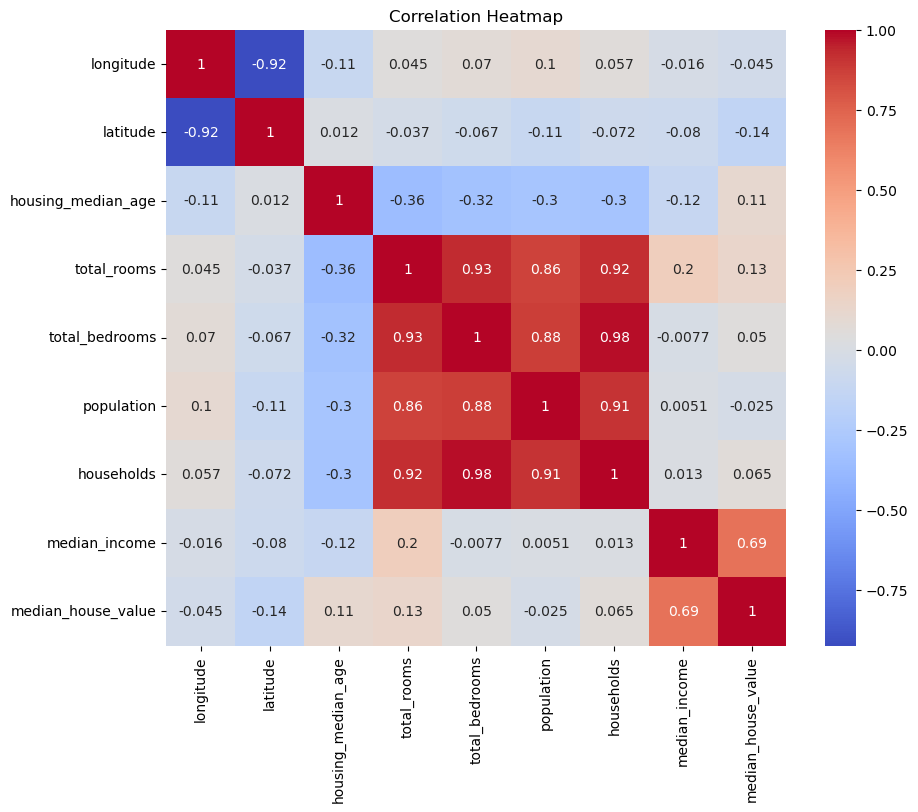

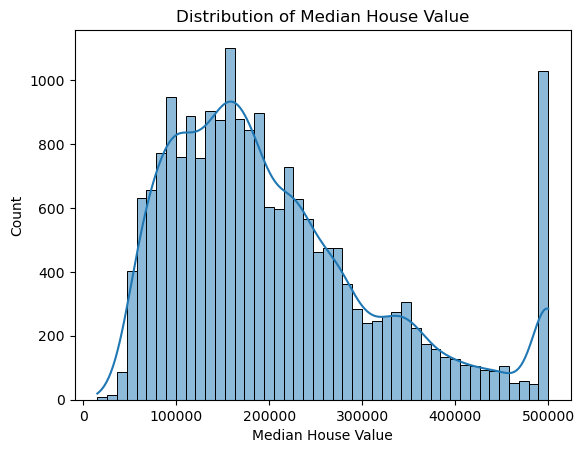

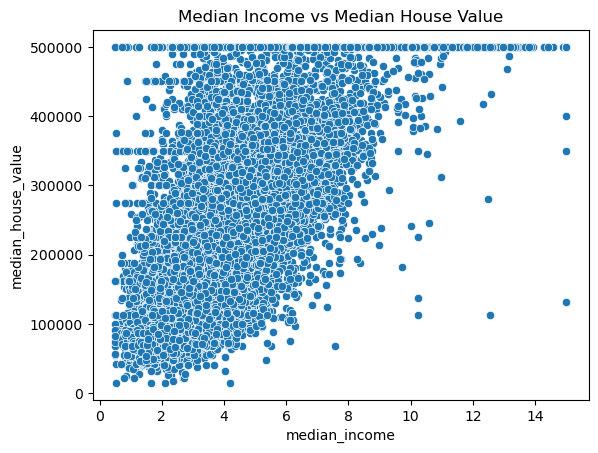

In [7]:
# 4. Exploratory Data Analysis (EDA)

# Summary statistics
print("\nSummary Statistics:")
display(data.describe())

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Histogram of target variable
sns.histplot(data['median_house_value'], kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.show()

# Scatter plot - Median Income vs House Value
sns.scatterplot(x='median_income', y='median_house_value', data=data)
plt.title("Median Income vs Median House Value")
plt.show()

In [8]:
print(data.columns.tolist())


['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [9]:
# 5. Data Preprocessing
# Encode only if not already encoded
if 'ocean_proximity' in data.columns:
    data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)
else:
    print("ocean_proximity is already encoded.")


In [10]:
# Features and Target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']


In [11]:
# 6. Feature Set for Simple & Multiple Regression

# Simple Linear Regression: using only 'median_income'
X_simple = data[['median_income']]

# Multiple Linear Regression: use all features
X_multiple = X.copy()

In [12]:
# 7. Train-Test Split
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y, test_size=0.2, random_state=42)

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multiple, y, test_size=0.2, random_state=42)

In [13]:
# 8. Simple Linear Regression Model
lr_simple = LinearRegression()
lr_simple.fit(X_train_simple, y_train_simple)
y_pred_simple = lr_simple.predict(X_test_simple)

print("\n--- Simple Linear Regression Results ---")
print("MSE:", mean_squared_error(y_test_simple, y_pred_simple))
print("RMSE:", np.sqrt(mean_squared_error(y_test_simple, y_pred_simple)))
print("R² Score:", r2_score(y_test_simple, y_pred_simple))



--- Simple Linear Regression Results ---
MSE: 7221011204.235034
RMSE: 84976.53325615863
R² Score: 0.4719622857489497


In [14]:
# 9. Multiple Linear Regression Model
lr_multi = LinearRegression()
lr_multi.fit(X_train_multi, y_train_multi)
y_pred_multi = lr_multi.predict(X_test_multi)

print("\n--- Multiple Linear Regression Results ---")
print("MSE:", mean_squared_error(y_test_multi, y_pred_multi))
print("RMSE:", np.sqrt(mean_squared_error(y_test_multi, y_pred_multi)))
print("R² Score:", r2_score(y_test_multi, y_pred_multi))



--- Multiple Linear Regression Results ---
MSE: 4802173538.604159
RMSE: 69297.7166911303
R² Score: 0.6488402154431994


In [15]:
# 10. Coefficients for Multiple Linear Regression
coeff_df = pd.DataFrame(lr_multi.coef_, X_multiple.columns, columns=['Coefficient'])
print("\nFeature Coefficients in Multiple Regression:")
display(coeff_df.sort_values(by="Coefficient", ascending=False))


Feature Coefficients in Multiple Regression:


,Coefficient
ocean_proximity_ISLAND,213653.374463
median_income,39277.083020
ocean_proximity_NEAR OCEAN,3166.477128
housing_median_age,1081.364206
total_bedrooms,103.004042
households,43.142725
total_rooms,-6.322146
population,-36.409751
ocean_proximity_NEAR BAY,-6232.416876
latitude,-25657.807543


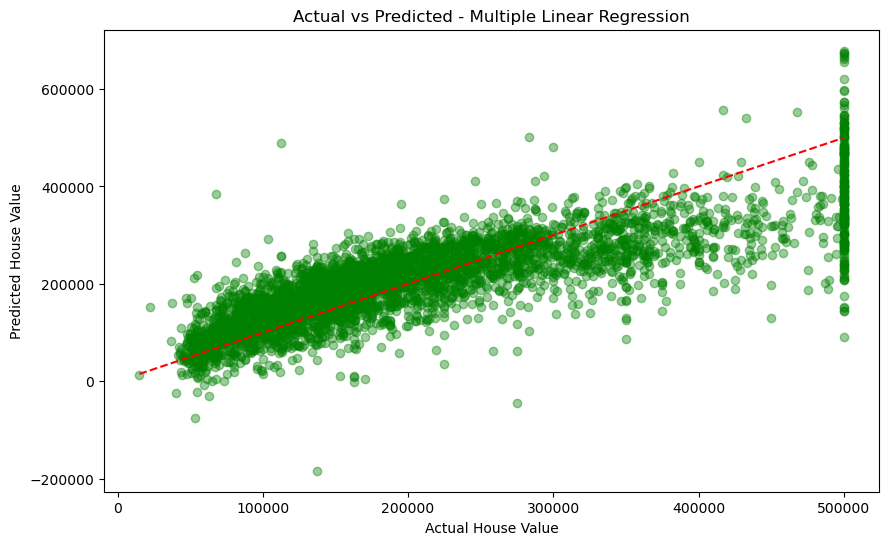

In [16]:
# 11. Visualizing Actual vs Predicted (Multiple Regression)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_multi, y_pred_multi, alpha=0.4, color='green')
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted - Multiple Linear Regression")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # diagonal line
plt.show()

## ✅ Final Summary

- The **Simple Linear Regression** model using only `median_income` provides a basic prediction and shows that income has a strong correlation with house values.

- The **Multiple Linear Regression** model, which includes all available features including `ocean_proximity`, offers better performance in terms of R² and RMSE.

- Important predictors include:
  - `median_income` (strongest positive correlation)
  - `latitude` (often negatively correlated)
  - Categorical dummy variables from `ocean_proximity`

- 📈 **Evaluation Metrics:**
  - MSE: Measures average squared prediction error
  - RMSE: Root of MSE, interpretable in the same units as house value
  - R² Score: Indicates proportion of variance explained by the model

- ✅ **Next Steps & Improvements:**
  - Try **Ridge or Lasso Regression** to handle multicollinearity and improve generalization
  - Consider **scaling features** using StandardScaler for better coefficient comparison
  - Explore **tree-based models** (e.g., Random Forest, XGBoost) for potentially higher accuracy
  - Use **cross-validation** for more reliable performance estimates


## 💾 Saving the Trained Regression Model

After training the model, we can save it to disk so that it can be reused later without retraining. This is especially useful for deployment or sharing.

We will use the `joblib` library to save and load the model efficiently.

In [17]:
import joblib

# Save the trained model (e.g., simple linear regression)
joblib.dump(lr_simple, 'simple_linear_regression_model.pkl')

['simple_linear_regression_model.pkl']

In [18]:
import joblib

# Save the trained model (e.g., multiple linear regression)
joblib.dump(lr_multi, 'multi_linear_regression_model.pkl')

['multi_linear_regression_model.pkl']